<div style="font-size:40px;">
Statistische Modellierung und Regressionsanalyse
</div>

# Einleitung EDA
<div style="text-align: justify;">
Mit der Checkliste wird erst die EDA verfolgt, um anschliessend besser die gestellten Fragen beantworten zu können. Bei der Auswahl der Fragen kann man viele Fragen stellen, hier kommen zwei zur Auswahl. Bei manchen Zeilen ist head verwendet worden, um das Maximum von 100 Seiten eher erreichen zu können.
</div>

Checkliste der explorativen Datenanalyse:

-   Frage/n formulieren
-   Daten einlesen
-   str() zur ersten Überprüfung
-   Typen überprüfen
-   Dimensionen überprüfen
-   Überprüfe den Anfang und das Ende des Datensatzes
-   Unwichtige Spalten fallen lassen
-   Duplikate erkennen
-   Namen der Spalten ändern
-   Fehlende Werte fallen lassen, imputieren
-   Darstellung und Umgang mit Outliers
-   Daten erkunden
-   Überprüfung von Korrelation
-   Mit mindestens einer weiteren Quelle überprüfen
-   Weitere Fragen und Anmerkungen
-   Quellenangaben

Fragen formulieren:

-   Welches Land erhält die höchste/niedrigste Punktzahl und aus welcher Provinz kommen diese Weine her?
-   Welche Degustierende kommen häufig vor und wo bewegen sich diese hauptsächlich

# Statistisches Vorgehen EDA
<div style="text-align: justify;">
Als erstes sollen die Daten eingelesen werden. Es handelt sich um einen Datensatz über Weine. Mit str können die Typen angesehen werden, mit head eine erste Einsicht gewonnen werden. Des Weiteren soll kurz die Währung angesehen werden, die Dimensionen den Anfang und das Ende des Datensatzes.
</div>
### Überprüfung der Daten in mehreren Schritten

In [2]:
data_eda <- read.csv('winemag-data-130k-v2.csv') # Hier den Pfad ändern, falls notwendig

## Erste Überprüfung, Typen überprüfen
str(data_eda)

# Head
head(data_eda, n = 2)

# Es werden nun die Preise auf Ihre Währung überprüft
# Beispiel Zeile 217 und 221
print(data_eda[217,])
print(data_eda[221,])

# Dimensionen
dim(data_eda)

# Überprüfe den Anfang und das Ende des Datensatzes
head(data_eda,1)
tail(data_eda,1)

'data.frame':	129971 obs. of  14 variables:
 $ id                   : int  0 1 2 3 4 5 6 7 8 9 ...
 $ country              : chr  "Italy" "Portugal" "US" "US" ...
 $ description          : chr  "Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering un"| __truncated__ "This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy r"| __truncated__ "Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp ac"| __truncated__ "Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with note"| __truncated__ ...
 $ designation          : chr  "Vulkà Bianco" "Avidagos" "" "Reserve Late Harvest" ...
 $ points               : int  87 87 87 87 87 87 87 87 87 87 ...
 $ price                : int  NA 15 14 13 65 15 16 24 12 27 ...
 $ province             : chr  "Sicily & Sardinia" "Douro" "Oregon" "

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0,Italy,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",Vulkà Bianco,87,NA,Sicily & Sardinia,Etna,,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
2,1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2016.",Avidagos,87,15,Douro,,,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


     id country
217 216   Italy
                                                                                                                                                                                                                                                                                                      description
217 Black-skinned berry, pipe tobacco and Mediterranean herb aromas waft out of the glass and carry over to the firm linear palate along with morello cherry, licorice and a hint of clove. Taut fine-grained tannins and fresh acidity provide the backbone while orange peel marks the finish. Drink 2019–2025.
    designation points price province               region_1 region_2
217                 90    57  Tuscany Brunello di Montalcino         
      taster_name taster_twitter_handle
217 Kerin O’Keefe          @kerinokeefe
                                            title    variety           winery
217 Podere Scopetone 2012  Brunello di Montalcino Sangiove

[1] 129971     14

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0,Italy,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",Vulkà Bianco,87,NA,Sicily & Sardinia,Etna,,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia


,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
129971,129970,France,"Big, rich and off-dry, this is powered by intense spiciness and rounded texture. Lychees dominate the fruit profile, giving an opulent feel to the aftertaste. Drink now.",Lieu-dit Harth Cuvée Caroline,90,21,Alsace,Alsace,,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Caroline Gewurztraminer (Alsace),Gewürztraminer,Domaine Schoffit


#### Resultate der Überprüfungen
<div style="text-align: justify;">
Eine Auflistung der Resultate, mit der Reihenfolge Typen, Währung, Dimensionen und Formatierung.
    
-   id: Ist vom Typ int, was Sinn macht, denn es handelt sich hier um eine Identifikation jedes einzelnen Eintrags. Für die exploratie Datenanalyse eher untwichtig und nicht aussagekräftig dann auch für die Verwendung in einer linearen oder logistischen Regressions ungünstig. Ist wohl noch ein Auszug aus einer DB Tabelle mit einem primary key. Da man Zeilen auch anders zählen kann, wird diese Spalte dann auch gelöscht (dropped), was man an Daten einsparen kann und dem Modell nicht dienlich ist, sollte man entfernen.

-   points: Ist vom Typ int, macht Sinn, denn üblicherweise ist die Punktevergabe mit ganzen Zahlen vorhanden.

-   price: Ist vom Typ int, und is der Preis des Weines.Hier wird anscheined gerundet, Rappen wie beispielsweise bei Coop oder Migros gibt es auch. Somit üblicherweise verkaufen Läden Ihre Produkte nicht gerundet.

-   country, description, designation, province, region_1, region_2, taster_name, taster_twitter_handle, title, variety, winery: Sind vom Typ chr, macht Sinn, denn die Einträge sind alle Strings. Eventuell für ein Modell müsste man hier dann numerische Werte verwenden (One hot encoding?).

Resultat zu den Features selbst:

-   country: Gibt das Land an
-   description: Beschreibt den Wein, es handelt sich ja um eine Degustation
-   designation: Name oder Titel des Weines
-   ponts: Punktevergabe
-   price: Preis des Weines, es wird jedoch keine Währung angegeben
-   province: Die Hauptregion oder Bundesland
-   region_1: Weinregion innerhalb der Provinz (wird noch unbenannt)
-   region_2: Unterregion von region_1 (wird noch unbenannt)
-   variety: Die Rebsorte, die verwendert wird
-   winery: Weingut
</div>

<div style="text-align: justify;">
Ein Wein stammt aus der Toskana (Preis 57) und eine aus Kalifornien (Preis 40) Die Überprüfung der Webpage WineEnthusiast (Ist auch die Quelle, <https://www.wineenthusiast.com/toplists/enthusiast-100-2023/>) gibt stets US Dollars an. Somit nehmen wir an, dass die Preise in US Dollar vorkommen.
</div>

<div style="text-align: justify;">
14 Spalten, 129971 Zeilen

Zeilen und Spalten können sich im Verlaufe der EDA verändern. Für ein Modell werden kleine Datensätze bevorzugt. Dies sind die nächsten Schritte nach der EDA, wobei es dann um Feature Eingineering / Selection geht.
</div>

<div style="text-align: justify;">
Die Formatierung schein zu stimmen, Umlaute und/oder spezielle Zeichen könnte man ebenfalls ausbessern.
</div>

### Spalten, Duplikate, Imputation
<div style="text-align: justify;">
Es sollen nun Spalten, Duplikate und die Imputation angewendet werden.
</div>

In [3]:
library(ggplot2)
# Unwichtige Spalten fallen lassen
data_eda2 <- data_eda[, c("country", "description", "designation", "points", "price","province","region_1","region_2","taster_name","variety","winery")]

# Duplikate erkennen
table(duplicated(data_eda2)) 
duplicated_rows <- data_eda2[duplicated(data_eda2), ]
dim(duplicated_rows)
head(duplicated_rows,2)


 FALSE   TRUE 
119987   9984 

[1] 9984   11

,country,description,designation,points,price,province,region_1,region_2,taster_name,variety,winery
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2409,US,"This is weighty, creamy and medium to full in body. It has plenty of lime and pear flavors, plus slight brown sugar and vanilla notes.",,85,14,California,North Coast,North Coast,Virginie Boone,Chardonnay,Souverain
2410,Italy,"There's a touch of toasted almond at the start, but then this Grillo revs up in the glass to deliver notes of citrus, stone fruit, crushed stone and lemon tart. The mouthfeel is crisp and simple.",Sallier de la Tour,85,13,Sicily & Sardinia,Sicilia,,,Grillo,Tasca d'Almerita


In [4]:
# Namen der Spalten ändern
names(data_eda2)[names(data_eda2) == "region_1"] <- "region"
names(data_eda2)[names(data_eda2) == "region_2"] <- "subregion"

# Fehlende Werte fallen lassen, imputieren
sapply(data_eda2, function(x) sum(is.na(x)))

country description designation      points       price    province 
          0           0           0           0        8996           0 
     region   subregion taster_name     variety      winery 
          0           0           0           0           0

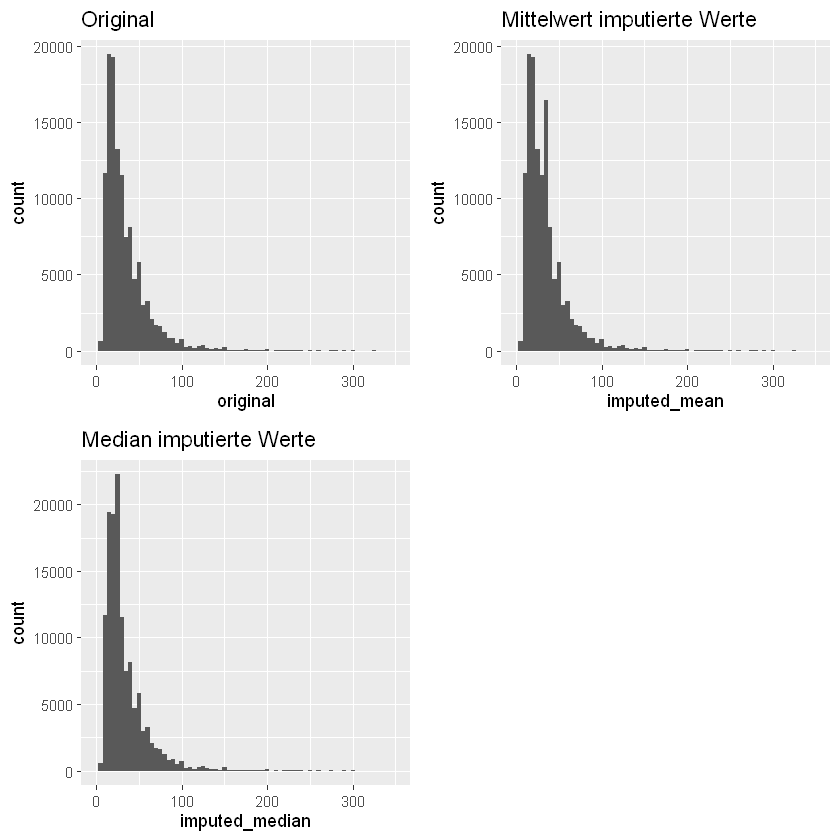

In [5]:
library(gridExtra)
value_imputed <- data.frame(
  original = data_eda2$price,
  imputed_mean = replace(data_eda2$price, is.na(data_eda2$price), mean(data_eda2$price, na.rm = TRUE)),
  imputed_median = replace(data_eda2$price, is.na(data_eda2$price),
  median(data_eda2$price, na.rm = TRUE)))
                           
original <- suppressWarnings(ggplot(value_imputed, aes(x = original)) +
  geom_histogram(binwidth = 5) + xlim(0,350) +
  ggtitle("Original"))

mean_imputed <- suppressWarnings(ggplot(value_imputed, aes(x = imputed_mean)) +
  geom_histogram(binwidth = 5) + xlim(0,350) +
  ggtitle("Mittelwert imputierte Werte"))

median_imputed <- suppressWarnings(ggplot(value_imputed, aes(x = imputed_median)) +
  geom_histogram(binwidth = 5) + xlim(0,350) +
  ggtitle("Median imputierte Werte"))

suppressWarnings(grid.arrange(original, mean_imputed, median_imputed, ncol = 2))

#### Resultate der Anpassungsschritte
<div style="text-align: justify;">

-   Die Spalte taster_twitter wird nicht weiter verwendet. Je nach Fragestellung ist eine Spalte mehr oder weniger wichtig. Insgesamt gesehen, könnte man so auch nachträglich weitere Fragen stellen, somit spricht dies für den Erhalt der Spalten.

-   Es gibt 9984 Duplikate im Datensatz. Hierbei handelt es sich aber um Zeilen, die teilweise übereinstimmende Werte haben. Beipsiel die Punkteanzahl von 85. Da das Feld Beschreibung üblicherweise immer ein Unikat ist, kann man auch nie reine Duplikate erkennen. Somit gibt es hier kein reinen Duplikate.

-   Bei der Spalte Preise gibt es  8996 NA Werte. Die Idee ist nun das Histogramm anzusehen, dies ohne Imputation und mit Imputation. Die Berechnungen sind der Mittelwert und der Median.
    
-   Es gibt sehr hohe Preise für Weine (Beispiel 3300). Diese werden eher bei den Outliers behandelt. Hier geht es in erster Linie um die Imputation und die Auswirkungen davon.

-   Die Mittelwert Imputation würde bei dem Bin 7 eine Erhöung von 7457 auf 16453 bedeuten.Die Bin Weite ist 5, 7\*5 ist 35. Somit gibt es einen Anstieg der Weine mit den Preisen zwischen 30 USD und 35 USD um 8996.

-   Die Median Imputation würde bei dem Bin 5 eine Erhöhung von 13245 auf 22241 bedeuten. Die Bin Weite ist 5, 5\*5 ist 25. Somit gibt es einen Anstieg der Weine mit den Preisen zwischen 20 USD und 25 USD.

-   Wie nun diese Imputationen dann richtige oder eher falsche Ergebnisse erzielen, könnte man weiterhin untersuchen, würde aber etwas den Rahme der Arbeit sprengen, da es sich nur um eine Teilarbeit handelt, die Auswirkungen von Imputation liegt nicht im Fokus der Semesterarbeit.

-   Da nur die Preise teilweise fehlen, aber alle anderen 14 Features keine NA Werter aufweisen, werden wir nicht imputieren und die Zeilen auch nicht fallen gelassen. Ebenfalls für die Fragestellung ist dies Spalte weniger relevant.
</div>

### Outliers bei Punkte und Preise und Korrelation
<div style="text-align: justify;">
Outliers bei den Punkte und Preisen werden anhand von Boxplots erkannst. Mit dem upper und lower boudn können dann die Outliers aus dem Datensatz gelesen werden. Die Prüfung der Korrelation soll anschliessend mehr über den Zusammenhang von Punkte und Preise zeigen.
</div>

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  80.00   86.00   88.00   88.45   91.00  100.00 

75% 
98.5

25% 
78.5

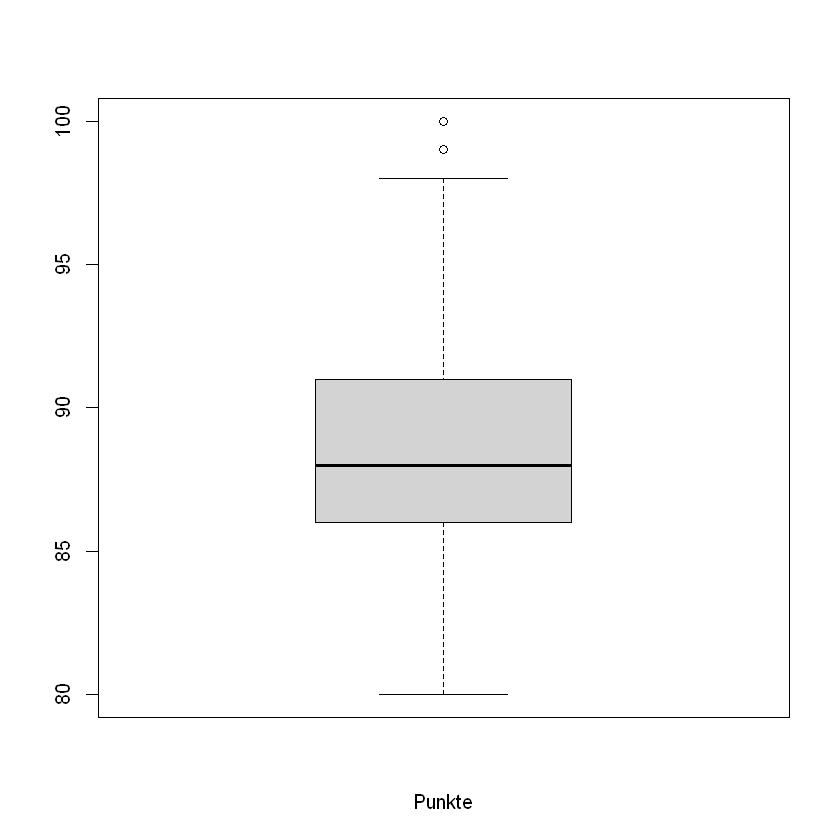

In [6]:
# Darstellung und Umgang mit Outliers (Boxplot) Punkte
# Boxplot Punkte
boxplot(data_eda2$points, xlab="Punkte")
summary(data_eda2$points)
q3_points <- quantile(data_eda2$points, 0.75)
iqr_points <- IQR(data_eda2$points)
upper_bound_points <- q3_points + 1.5*iqr_points
upper_bound_points
q1_points <- quantile(data_eda2$points, 0.25)
lower_bound_points <- q1_points - 1.5*iqr_points
lower_bound_points

In [7]:
# Empty values
sum(is.na(data_eda2$points))

# Select Outliers Punkte
outliers_points <- data_eda2[data_eda2$points >= 98.5, ]
head(outliers_points,2)
dim(outliers_points)

[1] 0

,country,description,designation,points,price,province,region,subregion,taster_name,variety,winery
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
346,Australia,"This wine contains some material over 100 years old, but shows no signs of fragility. Instead, it's concentrated through age and should hold in the bottle indefinitely. It's dark coffee-brown in color, with delectable aromas of rancio, dried fig, molasses and black tea, yet despite enormous concentration avoids excessive weight. And it's amazingly complex and fresh on the nearly endless finish.",Rare,100,350,Victoria,Rutherglen,,Joe Czerwinski,Muscat,Chambers Rosewood Vineyards
1557,US,"The flagship wine from Quilceda Creek offers exotic scents of plum, cassis, loam, coffee and pine sap, a rich and evocative blend. The wine delivers all that is promised and more; it is deep and dense with flavor, polished, focused and persistent. Vanilla, espresso, fine tannins, luscious acids and cascading fruits.",,99,125,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,Cabernet Sauvignon,Quilceda Creek


[1] 52 11

<div style="text-align: justify;">

-   Die Spalte Punkte hat keine leeren Werte, und es gibt 52 Outliers, die alle über dem upper bound von 98.5 liegen.

</div>

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   4.00   17.00   25.00   35.36   42.00 3300.00    8996 

75% 
79.5

25% 
-20.5

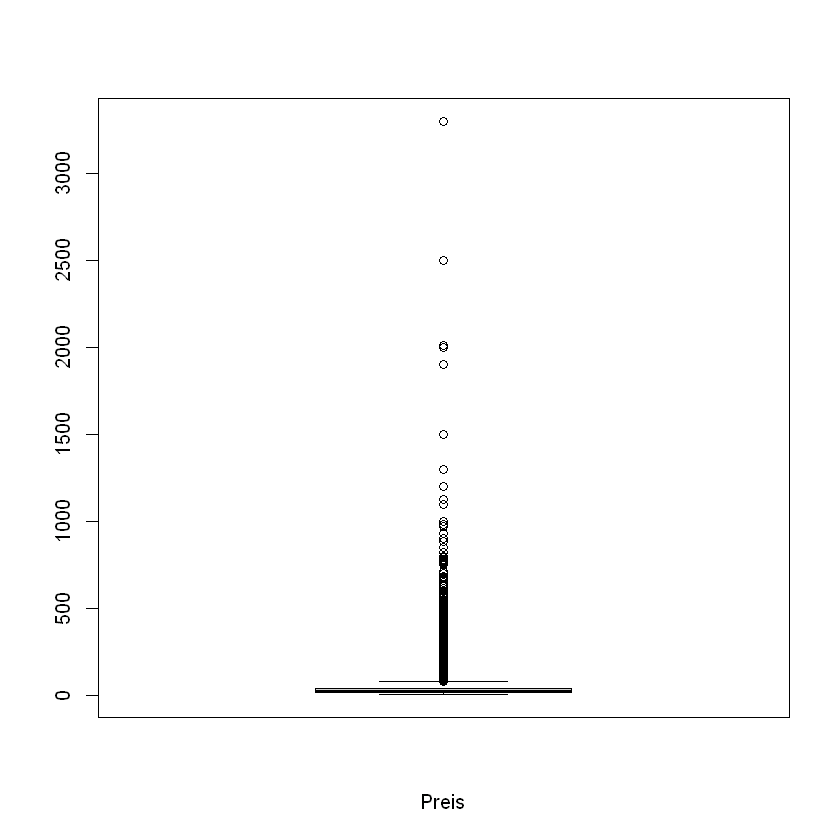

In [8]:
# Darstellung und Umgang mit Outliers (Boxplot) Preis
# Boxplot Preis
boxplot(data_eda2$price, xlab="Preis")
summary(data_eda2$price)
q3_price <- quantile(data_eda2$price, 0.75, na.rm=TRUE)
iqr_price <- IQR(data_eda2$price, na.rm=TRUE)
upper_bound_price <- q3_price + 1.5*iqr_price
upper_bound_price
q1_price <- quantile(data_eda2$price, 0.25, , na.rm=TRUE)
lower_bound_price <- q1_price - 1.5*iqr_price
lower_bound_price

In [9]:
# Empty values
sum(is.na(data_eda2$price))

# Select Outliers Preis
outliers_price <- data_eda2[data_eda2$price >= 79.5, ]
tail(outliers_price,2)
dim(outliers_price)

[1] 8996

,country,description,designation,points,price,province,region,subregion,taster_name,variety,winery
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
129932,France,"A powerful, chunky wine, packed with solid tannins that promise good aging. It has a sense of drama in its spice, dark tannins and spacious fruit. This is going to develop well over 5–10 years.",,91,107,Burgundy,Grands-Echezeaux,,Roger Voss,Pinot Noir,Henri de Villamont
NA.8995,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1] 16237    11

<div style="text-align: justify;">

-   Die Spalte Punkte hat 8996 leere Werte, und es gibt 16237 Outliers, die alle über dem upper bound von 79.5 liegen.

</div>

[1] 0.4161667


`geom_smooth()` using formula = 'y ~ x'


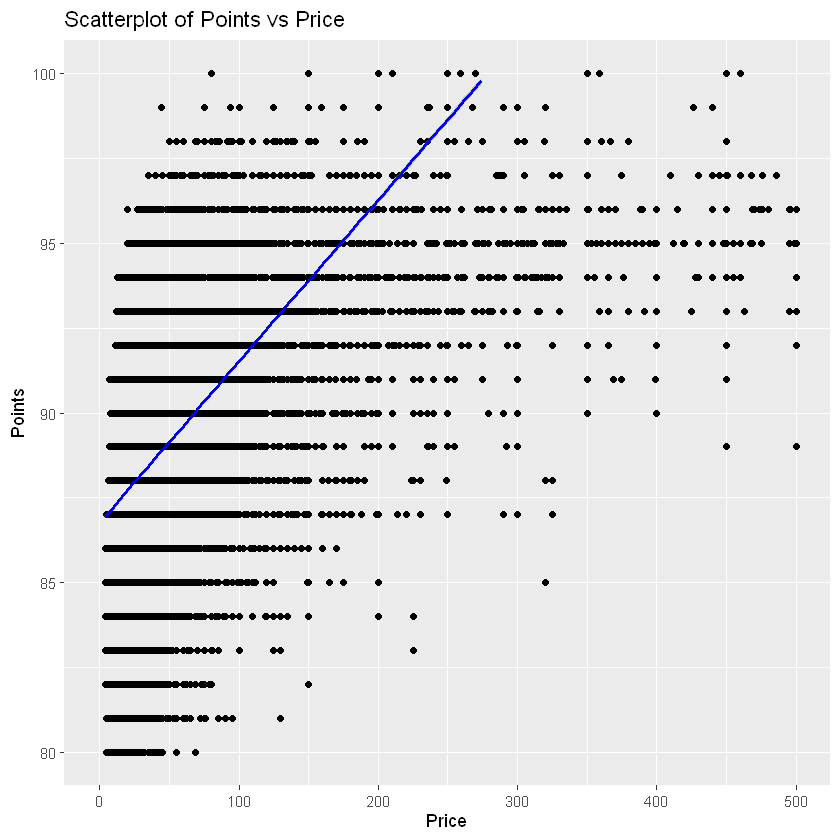

In [10]:
# Überprüfung der Korrelation mit einem Scatterplot
numeric_data <- data_eda2[, c("points", "price")]
numeric_data <- na.omit(numeric_data)
correlation <- cor(numeric_data$points, numeric_data$price, use = "complete.obs")
print(correlation)

suppressWarnings(print(ggplot(numeric_data, aes(x = price, y = points)) +
  geom_point() +
  geom_smooth(method = "lm", col = "blue") + 
  labs(title = "Scatterplot of Points vs Price", x = "Price", y = "Points") +
  xlim(0,500) +
  ylim(80,100)))

### Resultate Outliers bei Punkte und Preise und Korrelation
<div style="text-align: justify;">

Resultat für die Spalte Punkte:

-   Mit dem IQR kann bestimmt werden, was sich noch in dem Boxplot und in den Whiskers befindet. Hier ist 98.5 als upper bound berechnet. Alles was über 98.5 liegt sind Outliers. Die Punktzahl 99 und 100 ist nun nicht besonders weit entfernt von 98.5, daher ist es fraglich, ob man diese trotzdem Outliers nennen kann, obwohl die Rechnung es beweist.

-   Der lower bound liegt bei 78.5, hier gibt es keine Outliers, denn das Minimum an Punkten die erreicht werden können ist 80.

-   Aus dem Summary kann man erkennen, dass das Minimum 80 und das Maximum 100 beträgt. 52 Einträge (Zeilen) sind somit Outliers, siehe dim.

-   Will man nun die Outliers, die über den upper bound gehen löschen? Auf keinen Fall, es handelt sich hierbei um Weine, die die höchste Punktzahl erreicht haben. Es wäre noch interessant zu erfahren, warum diese Weine derart hoch ausgezeichnet werden. Dies in einem nächsten Schritt.

Resultat für die Spalte Preise:

-   Mit dem IQR kann bestimmt werden, was sich noch in dem Boxplot und in den Whiskers befindet. Hier ist 79.5 als upper bound berechnet. Alles was über 79.5 liegt sind Outliers. 7241 von 129971 sind Outliers. Der lower bound beträgt -20.5. Die kleinste Preis ist 4 und logischerweise wird kein Wein gratis verkauft. Somit gibt es keine Outliers in diesem Bereich. Aus dem Summary kann man erkennen, dass das Minimum 4 und das Maximum 3300 beträgt.

-   Will man nun die Outliers, die über den upper bound gehen löschen? Auf keinen Fall, es handelt sich hierbei um Weine, die nebst der hohen Punktzahl auch einen hohen Preis erzielt haben. Es wäre noch interessant zu erfahren, warum diese Weine derart hoch ausgezeichnet werden. Dies in einem nächsten Schritt.

-   Es ist anzumerken, dass 8996 Werte in dem Boxplot ignoriert sind, weil diese NA Werte aufweisen. 7241 Werte werden als Outliers gekennzeichnet, ev. könnte man diese ignorieren. Jedoch können Outliers auch so wichtige Informationen liefern. Wie nun die vorangegangene Imputation die Resultate hätte verändern können bedarf einer weiteren Untersuchung. Ist hier aber out-of-scope. Ebenfalls out-of-scope ist die Untersuchung des Modell, sollte man hier die Outliers ignorieren wollen.

Resultat der Korrelation:

-   Mit eine Wert von 0.4161667 kann gesagt werden, dass eher keine Korrelation vorliegt. Es ist näher zu 0 als zu 1 oder -1. Man kann erkennen, dass eine höhere Punktzahl auch einen höheren Preis bedeutet. Es gitb aber viele kostengünstigere Weine, die eine hohe Punktzahl erhalten und umgekehrt.

Resultat des Scatterplots, das die Ergebnisse der Korrelation weiter unterstütz:

-   Es ist interessant zu sehen, dass eine hohe Anzahl an Punkten nicht immer auch einen hohen Preis bedeutet. Der eine 3300 US Dollar hat eine Punktzahl von 88 und kommt aus Frankreich, Bordeaux (visuell aus der Tabelle). Der eine 350 US Dollar hat eine Punktzahl von 100 und kommt aus Australien Victoria (visuell aus der Tabelle). Zu erkennen ist eine Zunahme des Preises mit der Zunahme der Punkte. 94, 95, 96 und 97 sind das zu erreichende Maximum, danach folgt eine Abnahme
</div>

### Fragen beantworten
<div style="text-align: justify;">

-   Welches Land erhält die höchste/niedrigste Punktzahl und aus welcher Provinz kommen diese Weine her? ACHTUNG: Mit head gekürzt um die erlaubten 100 Seiten erreichen zu können.
-   Welche Degustierende kommen häufig vor und wo bewegen sich diese hauptsächlich.
</div>

In [11]:
# Welches Land erhält die höchste/niedrigste Punktzahl und aus welcher Provinz kommen diese Weine her?

# Maximum points
max_points <- max(data_eda2$points, na.rm = TRUE)
highest_points_data <- subset(data_eda2, points == max_points)
highest_points_info <- highest_points_data[, c("country", "province", "points")]
head(highest_points_info)

# Minimum points
min_points <- min(data_eda2$points, na.rm = TRUE)
lowest_points_data <- subset(data_eda2, points == min_points)
lowest_points_info <- lowest_points_data[, c("country", "province", "points")]
head(lowest_points_info)

,country,province,points
,<chr>,<chr>,<int>
346,Australia,Victoria,100
7336,Italy,Tuscany,100
36529,France,Champagne,100
39287,Italy,Tuscany,100
42198,Portugal,Douro,100
45782,Italy,Tuscany,100


,country,province,points
,<chr>,<chr>,<int>
345,Chile,Leyda Valley,80
3641,Portugal,Vinho Verde,80
3642,Chile,Maule Valley,80
4557,Italy,Central Italy,80
4558,Spain,Catalonia,80
5906,Argentina,Mendoza Province,80


In [12]:
# Welche Degustierende kommen vor und wo bewegen sich diese hauptsächlich?
taster_country_data <- data_eda2[, c("taster_name", "country")]
head(taster_country_data)
taster_summary <- aggregate(country ~ taster_name, data = taster_country_data, 
                            function(x) paste(unique(x), collapse = ", "))
head(taster_summary,5)

,taster_name,country
,<chr>,<chr>
1,Kerin O’Keefe,Italy
2,Roger Voss,Portugal
3,Paul Gregutt,US
4,Alexander Peartree,US
5,Paul Gregutt,US
6,Michael Schachner,Spain


,taster_name,country
,<chr>,<chr>
1,,"Italy, US, France, South Africa, Australia, Mexico, Chile, New Zealand, Germany, Spain, Israel, Argentina, Portugal, Austria, Hungary, Canada"
2,Alexander Peartree,US
3,Anna Lee C. Iijima,"Germany, US, Romania, Czech Republic, Slovenia, Canada, Croatia, Bulgaria, Hungary, Morocco, Bosnia and Herzegovina, Slovakia, Georgia, Turkey, Lebanon, Moldova, Ukraine, Macedonia"
4,Anne Krebiehl MW,"Austria, France, England,"
5,Carrie Dykes,US


#### Resultate der Fragen
<div style="text-align: justify;">

-   Höchste Punktzahl, siehe Output: Australien, Frankreich, Italien, Portugal und US. Frankeich ist mit Bordeaux und Champagne gut vertreten. Italien mit der Toskana. Portugal mit Duoro und Port. US mit California und Washington. Australien einmal mit Victoria.

-   Bemerkung: Es ist nicht überraschend, das Frankreich und Italien gut vertreten sind. Es gehört vorallem bei Frankreich zur Kultur, haben das passende Klima und Weine stellen diese schon seit Jahrzenten her. US mit Kalifornien hat ebenfalls ein gutes Klima. Australien kommt nur einmal vor. Insgesamt kann bestimmt auch das Klima berücksichtig werden, diese Untersuchung wäre aber out-of-scope.

-   Niedrigste Punktzahl, siehe Output: Hier auch erreichen die Länder mit der Maximalanzahl der Punkte auch das Minimun, das zu erreichen ist. Beispielweise liefert US Kalifornien ebenfalls Weine mit der niedrigsten Anzahl Punkte.

-   Siehe Output: Anna Lee C. Iijima, Jeff Jenssen, Joe Czerwinski, Susan Kostrzewa sind sehr weit gekommen. Deren Aufenthalt ist in der USA, in Europa und auch in Nahosten. 
</div>

### Übeprüfung mit einer zweite Quelle
<div style="text-align: justify;">
Bei der EDA wird ebenfalls noch mit einer weiteren Quelle verglichen. Zum einen kann man so auch die Aussagen von Fragen unterstützen oder auch Unterschiede erkennen und daraus erneut Wissen generieren. Dieses mal wird nur das Land Frankreich mit Bordeaux und Burgundy berücksichtigt. DIe Boxplots in Vergleich zeigen einen starken Unterschied. Ebenfalls die teursten Weine unterscheiden sich im Preis.
</div>

#### Resultat des Quellenvergleichs
<div style="text-align: justify;">
Auch bei der zweiten Quelle wird Frankreich, Bordeaux und Burgundy angesehen, siehe Quelle2_FR. Die Preisliste ist in EUR, das Maximum ist 60.45 Euro, im Vergleich zur ersten Quelle mit 3300 USD.

-   Hier ein Bespiel des teuersten Weins aus der ersten Quelle in USD: <https://www.wineenthusiast.com/buying-guide/chateau-les-ormes-sorbet-2013-medoc/?queryID=ac1352b7cc25cfd3c23491b18663e1af&objectID=wine#230236&indexName=PROD_WINEENTHUSIAST_REVIEWS>

-   Wir haben Anzahl Zeilen aus Quelle 1 mit 9921 und aus der Quelle 2 131 Einträge. Der Mittelwert der Quelle 1 liegt bei 52.96 bei der Quelle 2 14.46. Aufgrund der Outliers macht es auch Sinn den Median zu betrachten: Quelle 1 ist 28, Quelle 2 ist 10.85

-   Aufgrund der wenigen Zeilen, die die zweite Quelle hergibt, kann nicht besonders viel daraus hergeleitet werden. Die Zunahme der zweiten Quelle besagt aber, dass es viele Degustierende geben kann, die Weine von unterschiedlicher Qualität testen. Wine Enthusiast, wie der Name bereits sagt, berücksichtigt auch sehr teure Weine, es gibt deutlich mehr Daten, möglicherweise werden auch andere Weinorte berücksichtigt, die eher einem höheren Standard entsprechen. Jeder kann Wein degustieren, eine Liste erstellen, Votings hinzufügen etc. Nicht jeder kann aber Weine auf hohem Niveau bewerten.

Weitere Fragen und Anmerkungen:

-   Wie die teuersten Weine zustandekommen ist wohl ein Thema von Jahrgang und das Klima zu jener Zeit, wie die Trauben wachsen (Boden, Licht. Wetter) usw.. Interessant ist, dass es auch hohe Punktzahlen gibt aber der Preis nicht übetrieben ist, siehe auch Resultat bei den Outliers in der ersten Quelle.

-   Die zweite Quelle liefert deutliche Unterschiede in den Preisen der Weine. Die erwähnte Outliers aus der ersten Quelle kommen da nicht vor. Der einzige sehr teuer Wein mit 3410.79 EUR stammt aus dem Pomerol.

-   Die erste Quelle liefert nebst "normalen" Weinen auch sehr qualitativ hochwertige Weine an.
</div>

# Beschreibung Ergebnisse EDA
<div style="text-align: justify;">
Die Ergebnisse kommen alle bei den bereits erwähnten Resultaten vor.
</div>

# Analyse/Hinterfragn Ergebnisse EDA
<div style="text-align: justify;">
Die Analyse der Ergebnisse kommt bei den bereits erwähnten Resultaten vor.
</div>

# Einleitung lineare Regression

# Statistisches Vorgehen lineare Regression
<div style="text-align: justify;">
Die Schritte der linearen Regression sind Modellannahmen prüfen, Residuen überprüfen und das Treffen von Vorhersagen. Der Datensatz wird dazu dann aufgetrennt in 98% und 2%. Die 98% dienen der Modellbildung, 2% dienen dann den Vorhersagen.
</div>

## Multiple lineare Regression, Modellannahmen prüfen
<div style="text-align: justify;">

</div>

In [13]:
## Multiple lineare Regressionsanalyse
# Modell erstellen vor der Kürzung des Datensatz 
# (Die Kürzung wird dann für die Vorhersage verwendet. Der Datensatz wird dann um 2% gekürzt.)
data_eda2$country <- factor(data_eda2$country)
data_eda2$variety <- factor(data_eda2$variety)
data_eda2 <- na.omit(data_eda2)

In [14]:
mlr <- lm(price ~ points + country + variety, data=data_eda2)
coefficients <- summary(mlr)$coefficients
significant_coefficients <- coefficients[coefficients[, "Pr(>|t|)"] < 0.05, ]
print(significant_coefficients)

                           Estimate  Std. Error    t value     Pr(>|t|)
(Intercept)             -436.642229 36.72037107 -11.891008 1.374768e-32
points                     5.130424  0.03669983 139.794190 0.000000e+00
countryFrance             15.265413  5.18057767   2.946662 3.212854e-03
countryGermany            19.054967  5.25809419   3.623930 2.902793e-04
countryItaly              12.386156  5.19013041   2.386483 1.701195e-02
countryMexico             15.846382  6.77765172   2.338034 1.938710e-02
countrySwitzerland        61.253042 14.81510780   4.134499 3.559715e-05
countryUruguay            14.170548  6.43754410   2.201235 2.772128e-02
varietyFrancisa          117.387529 51.19676338   2.292870 2.185720e-02
varietyRamisco           445.322041 51.22041539   8.694229 3.534735e-18
varietyRosenmuskateller  110.180384 51.20577802   2.151718 3.142157e-02
varietyTerrantez         176.061194 51.22065288   3.437309 5.877244e-04


<div style="text-align: justify;">

-   Dies sind die Variablen, die dem Modell am meisten beisteuern.

</div>

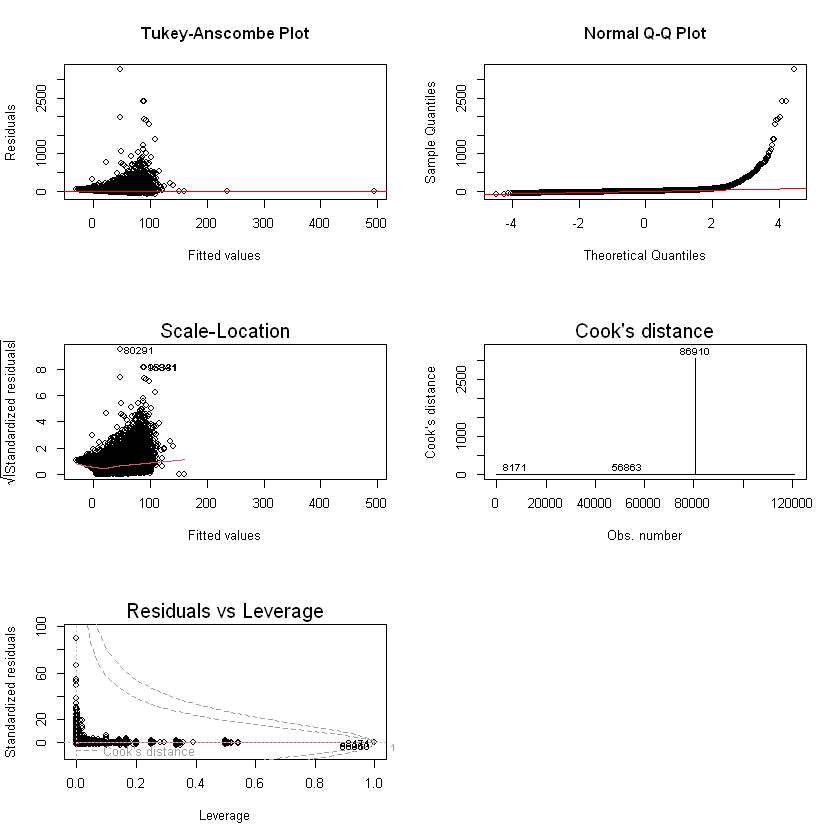

In [15]:
# Modellprüfung
 # Residuals vs. Fitted, Tukey-Anscombe
par(mfrow = c(3, 2))
suppressWarnings(plot(mlr$fitted.values, mlr$residuals,
     xlab = "Fitted values",
     ylab = "Residuals",
     main = "Tukey-Anscombe Plot"))
abline(h = 0, col = "red")

# Q-Q Plot
suppressWarnings(qqnorm(mlr$residuals))
qqline(mlr$residuals, col = "red")

suppressWarnings(plot(mlr, which=3)) # Scale-Location
suppressWarnings(plot(mlr, which=4)) # Cook's distance
suppressWarnings(plot(mlr, which=5)) # Residuals vs. Leverage

<div style="text-align: justify;">

-   Man erkennt bei den Plots, dass die Resultate schlecht ausfallen. Das Modell ist ungeeignet. Mehr dazu bei den Resultaten.

</div>

In [17]:
# Kürzung des Datensatz
# Antstelle der vorhandenen Libraries wie caret oder caTools
# werde ich von Hand 98% der Daten für das Modell wählen und 2% dann für die Vorhersage
# 98% sind gerundet 127373 Zeilen, 2% sind 2598 Zeilen
library(dplyr)
# Mixen
set.seed(123)
shuffled_dataset <- data_eda2[sample(nrow(data_eda2)), ]
data_frame <- as.data.frame(shuffled_dataset)
dim(data_eda2)
# 98% wählen, mit diesen wird das Modell neu gebildet
data_98 <- data_frame %>% slice(1:118556)

# 2% wählen, mit diesen wird die Vorhersage getan, aus diesen kann stichprobenweise Werte entnommen werden
#data_2 <- data_frame %>% filter(row_number() >= 127374 & row_number() <= 129970)
data_2 <- data_frame %>% slice(118557:120975)

# Modell erneut bilden und auswerten
mlr2 <- lm(price ~ points + country + variety, data=data_98)
coefficients2 <- summary(mlr2)$coefficients
significant_coefficients2 <- coefficients2[coefficients2[, "Pr(>|t|)"] < 0.05, ]
print(suppressWarnings(significant_coefficients2))

[1] 120975     11

                           Estimate  Std. Error    t value     Pr(>|t|)
(Intercept)             -436.336579 36.81804993 -11.851159 2.214299e-32
points                     5.127084  0.03716126 137.968514 0.000000e+00
countryBrazil             14.928660  7.46652778   1.999411 4.556616e-02
countryFrance             15.358101  5.19479944   2.956438 3.112767e-03
countryGermany            18.815741  5.27399214   3.567647 3.603446e-04
countryItaly              12.343490  5.20458973   2.371655 1.771023e-02
countryMexico             15.869392  6.79576957   2.335187 1.953533e-02
countrySwitzerland        72.884771 15.94394951   4.571312 4.851711e-06
countryUruguay            14.305116  6.47054738   2.210805 2.705129e-02
varietyFrancisa          117.428477 51.32853464   2.287782 2.215201e-02
varietyRamisco           445.389115 51.35257816   8.673160 4.255012e-18
varietyRosenmuskateller  110.233860 51.33772797   2.147229 3.177709e-02
varietyTerrantez         176.134947 51.35282033   3.429898 6.040

<div style="text-align: justify;">

-   Auch bei dem gekürzten Datensatz (noch 98%) sind es diese Variablen, die für das Modell wichtig sind. Dieser Datensatz wird bei den Vorhersagen verwendet.

</div>

### Resultat Multiple lineare Regression, Modellannahmen prüfen
<div style="text-align: justify;">

-   Die wichtisten Variablen, die anscheinend Aussagekraft bieten sind: Punkte, Frankreich, Deutschland, Italien, Mexiko, Schweiz und Uruguay.
    Die wichtigen variety Spalten sind hier:  varietyFrancisa, varietyRamisco, varietyRosenmuskateller, varietyTerrantez
    Aufgrund der Ladezeit habe ich mit Absicht nur wenige Features gewählt.
    Idealerweise würde mann alle Features verwenden.

-   Als nächstes würde man untersuchen, warum genau dies Variablen zum Modell Wert beisteuern.
    Dies jedoch gerade out-o-scope für eine Teilaufgabe.
    
-   Residuals vs. Fitted, Tukey-Anscombe: Die Punkte streuen nicht um den Wert 0, es sieht mehr nach einem Funnel Form aus, was auf Heteroskedastizität hindeutet, also die Varianz scheint nich konstant zu sein.
    Ebenfalls kann dies auf Nicht-Linearität hinweisen.
    Ebenfalls die Kurvenform deutet wie die Funnel Form auf dasselbe Problem.

-   Q-Q Plot: Die Punkte weichen nach 2 stark von der Linie ab.
    Somit folgen die Residuen keiner Normalverteilung.

-   Scale-Location: Die rote Linie ist nicht horizontal und die Punkte sind nicht zufällig verteilt.
    Homoskedastizität kommt somit hier wohl nicht vor.
    Mit Breusch-Pagan kann auch Homoskedastizität geprüft werden.

-   Cook's distance: Es gibt Outliers und diese könnten das Modell beeinflussen.
    Hier sind diese aber sehr interessant, denn es handelt sich um Weine, die nicht der Norm entsprechen.
    Interessant wäre zu wissen, warum diese zu Outliern werden.
    Ev.
    gibt es dazu mehr über den Wachstum der Trauben, Boden, Lichteinfluss, Klima usw..
    zu erfahren.
    Vorausgesetzt, dass die Daten stimmen.

-   Residuals vs. Leverage: Hohe Hebelwirkung aber kleine Resiuden deutet eher darauf hin, dass diese Outliers keinen grossen Einfluss auf das Modlel haben.

-   Die beiden ersten Plots könnte man ebenso mit "which" zeichnen.
    Ich habe dies nun ohne "which", weil diese schneller zeichnen.

-   Mit eine Transformation könnte man nun das Modell verbessern, damit es den Modellannahmen besser entspräche.
    Wie eine lineare, logistische Transformation oder Wurzeltransformation.
    Ev.
    eignen sich auch nicht lineare Modell ohne Transformation.

-   Auch nach der Kürzung des Datensatzes gibt es natürlich keine Verbesserung am Modell. Die Resultate sind dieselben Werte. Das gebildete Modell mlr2 auf den gekürzten Datensatz soll für die Vorhersagen verwendet werden. Der Rest des Datensatzes würd für die Vorhersage verwendet.

-   1209756 wird entsprechend rechnerisch von Hand in 98% und 2% mit slice getrennt. Dies sind dann die 1:118556 und die 118557:120975.
    
</div>

## Multiple lineare Regression, Vorhersagen treffen

   original predicted
1        17        15
2        48        37
3        20        33
4        34        42
5        24        31
6        13        22
7        14        17
8        25        24
9        22        30
10       18        22
   original predicted
79       25        38


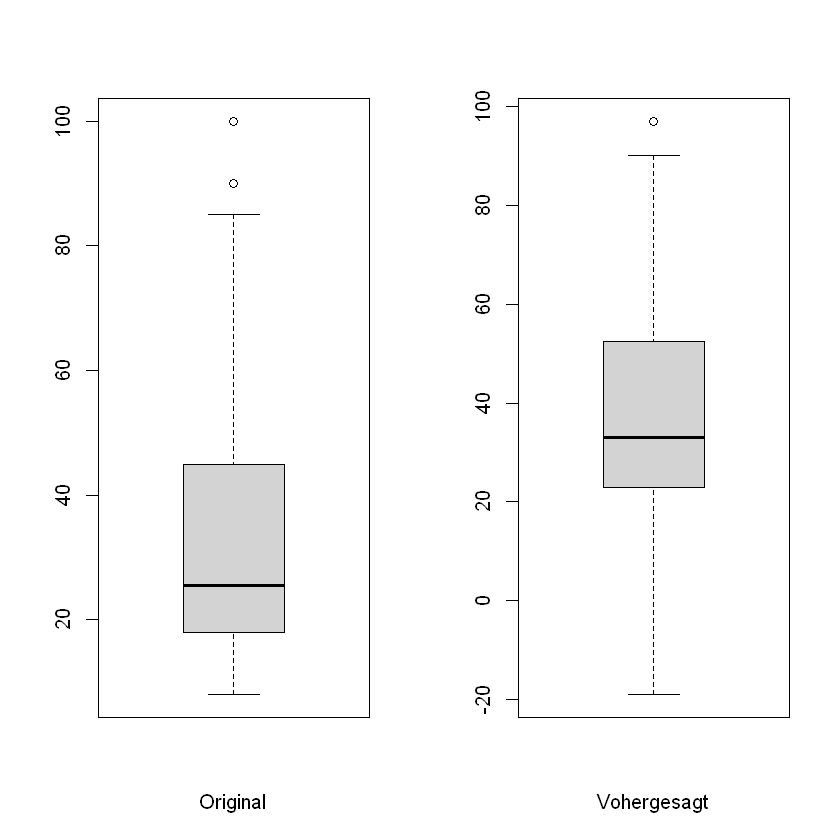

In [18]:
# Einige Vorhersagen des Modells mlr2

# Herstellung des leeren dataframes für die Originalwerte price und vorhergesagten Werte price
empty_df <- data.frame(
  original = numeric(),
  predicted = numeric()
)

# 100 Vorhersagen von dem davor generierten data_2, das somit als Testdatensatz dient, die Vorhersagen dürfte schlecht ausfallen, da keine Transformation angewendet worden ist.
for (x in 1:100) {
  prediction <- suppressWarnings(predict(mlr2, newdata = data_2[x,]))
  empty_df[x, ] <- c(data_2[x,]$price,round(prediction)) 
}
print(head(empty_df,10))

par(mfrow = c(1, 2))
boxplot(empty_df$original, xlab="Original")
boxplot(empty_df$predicted, xlab="Vohergesagt")

# Beispiel Zeile 79
print(empty_df[79,])

### Multiple lineare Regression, Vorhersagen treffen
<div style="text-align: justify;">
    
-   Wie erwartet sind die Vorhersagen nicht besonders genau. Das hat auch die visuelle Modellbeurteilung ergeben.

-   Bei der Liste mit den zehn Einträgen kann man erkennen, dass es wenige gibt, die eine gute Vorhersage liefern, siehe dazu die 10 Zeilen.

-   Die Boxplots sind nicht übereinstimmend aber auch nicht krass unterschiedlich, es unterstützt die Zahlenwerte, die manchmal besser stimmen und manchmal nicht. Eine weitere Untersuchung dieser Werte wird nicht unternommen. 
</div>

# Beschreibung Ergebnisse multiple lineare Regression
<div style="text-align: justify;">
Die Ergebnisse kommen alle bei den bereits erwähnten Resultaten vor.
</div>

# Analyse/Hinterfragen Ergebnisse multiple lineare Regression
<div style="text-align: justify;">
Die Analyse der Ergebnisse kommt bei den bereits erwähnten Resultaten vor. 
    
-   Es könnte weiterhin gesehen werden, wie die Resutlate sich ändern, wenn man mehrere shuffle vornehmen und wiederum diese vergleichen würde.

-   Mit einer Transformation würde ertwartet werden, dass sich die Werte verbessern.
</div>

# Einleitung logistische Regression
<div style="text-align: justify;">
Anbei nun die logistische Regression.
</div>

# Statistisches Vorgehen logistische Regression
<div style="text-align: justify;">
Auch hier folgt diese typische Vorgehensweise: Modellprüfung, Residuenanalyse und die Vorhersagen.
</div>

## Modellprüfung logistische Regression
<div style="text-align: justify;">
Auch hier gilt es das Modell auf Tauglichkeit zu prüfen, was im Endeffekt beduten wird, wie gut die Vorhersagen sind.
</div>

In [19]:
# Logistische Regression
# Auswahl eines Datensatzes, der mehr numerische Werte hat, in diesem Fall der movie Datensatz.
# Für die logistische Regression kommt nun auch noch eine Spalte mit 0 und 1 dazu.
# Bei einem Wert von 6 oder darüber ergibt dies eine 1, sonst eine 0
# Die 6 ist hier willkürlich gewählt, ev. müsste man genauer angeben, wie man den Threshold wählt.
# Hier entspricht die 6 einem Minimum.

# Neuer Datensatz
dataset2 <- read.csv('movies.csv') # Hier den Pfad ändern, falls notwendig
votes <- ifelse(dataset2$vote_average >= 6, 1, 0)

# Modell erstellen
logit_model <- glm(votes ~ vote_count + popularity + runtime, data = dataset2, family = binomial())
summary(logit_model)


Call:
glm(formula = votes ~ vote_count + popularity + runtime, family = binomial(), 
    data = dataset2)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.288e-01  8.340e-02  -8.738   <2e-16 ***
vote_count   4.191e-04  2.694e-05  15.554   <2e-16 ***
popularity   1.028e-03  4.152e-04   2.475   0.0133 *  
runtime      1.334e-02  8.673e-04  15.384   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 11873  on 9988  degrees of freedom
Residual deviance: 10857  on 9985  degrees of freedom
  (25 observations deleted due to missingness)
AIC: 10865

Number of Fisher Scoring iterations: 6


### Resultat Modellprüfung logistische Regression
<div style="text-align: justify;">
-   vote_count und runtime scheinen für dieses Modell wichtige Features zu sein. 
</div>

## Residuenanalyse logistische Regression
<div style="text-align: justify;">
Es folgt die Residuenanalyse.
</div>

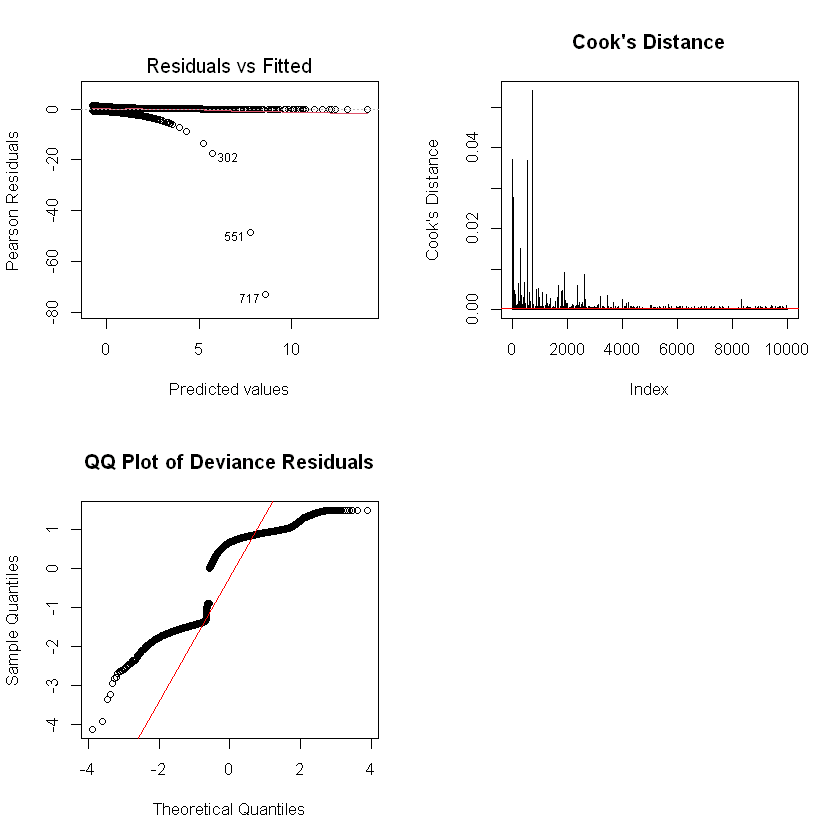

In [20]:
par(mfrow = c(2, 2))
# Residuenanalyse
plot(logit_model, which = 1)
# Cook's distance
cooks_d <- cooks.distance(logit_model)
plot(cooks_d, type = "h", main = "Cook's Distance", ylab = "Cook's Distance")
abline(h = 4 / nrow(dataset2), col = "red")  # Rule of thumb threshold
# Q-Q Plot
deviance_residuals <- residuals(logit_model, type = "deviance")
qqnorm(deviance_residuals, main = "QQ Plot of Deviance Residuals")
qqline(deviance_residuals, col = "red")

### Resultat Residuenanalyse logistische Regression
<div style="text-align: justify;">

-   Der Residuenplot zeigt Übereinstimmungen und Abweichungen.
    Der Erwartungswert ist nahe bei 0 mit Abweichungen.
    Die Werte sind am Anfang gut verstreut, weichen dann aber in eine Kurve aus mit Outliers.

-   Cook's Distanz zeigt hier Werte an, die das Modell beinflussen könnten.

-   Der Q-Q Plot zeigt hier weniger eine Normalverteilung der Residuen an (gibt es bei der logistischen Regression nicht), sondern zeigt eher Outliers an.

</div>

## Vorhersage logistische Regression
<div style="text-align: justify;">
</div>

In [21]:
# Vorhersage
# Dieses Mal wird der Datensatz nicht aufgetrennt, sondern es wird willkürlich ein Zeile bestimmt. Diese Zeile sollte sich einer bereits bestehenden Zeile aus dataset2 ähnlich sein und müsste somit auch eine ähnliche Vorhersage ergeben.
data_log <- data.frame(original_title="Some title", popularity=5402.308, release_date="30/09/2021", vote_average = "7", vote_count=1740, revenue=424000000, runtime=100)

pred <- predict(logit_model, newdata = data_log,
type = "response")
print(pred)

        1 
0.9989793 


### Resultat Vorhersage logistische Regression
<div style="text-align: justify;">
Das Resultat entspricht einer 1.
    Der vote_average ist bei der ersten Zeile auf grösser als 6, was dann auch eine 1 ergibt.
    Da nun data_log nur geringfügig sich von der Originalzeile unterscheidet, wird hier als pred auch eine 1 erwartet.

-   Das Resultat könnte aber auch nur Zufall sein, den auch bei dem logistischen Modell sollte man eine Transformation versuchen, um das Modell verbessern zu können.

-   Hier habe ich auf 100 Werte verzichtet, da wie bei der linearen Regression auch die Werte nur aus Zufall besser oder schlechter sind, da eine Transformation nicht angewendet worden ist.

-   ROC ist nicht thematisiert worden

Anmerkungen:

-   Aufgrund der Ladezeit habe ich nur wenige Features bei dem dataset2 verwendet.

-   Für die logistische Regression habe ich einen neuen Datensatz dataset2 verwendet, weil dataset nur zwei numerische Spalten vorweisen kann und die Umrechnung nicht numerischer Spalten in numerische Spalten nicht Thema dieser Teilarbeit ist.
    Eine Schwäche sind die 0 Werte bei den Einnahmen.
    Diese könnten für das Modell ein Problem darstellen.
    Macht auch nicht Sinn, denn die Einnahmen sind immer gösser als 0.
</div>

# Beschreibung Ergebnisse logistische Regression
<div style="text-align: justify;">
Die Ergebnisse kommen alle bei den bereits erwähnten Resultaten vor.
</div>

# Analyse/Hinterfragen Ergebnisse logistische Regression
<div style="text-align: justify;">
-   Die Wahl der Zahl 6, um die 1 und 0 zu bestimmen ist willkürlich gewählt. Es könnte weiter untersucht werden, welcher Wert am besten ist und wie sich die Resultate dann unterscheiden.
</div>

# Quellenangaben
 
-   Datensatz für EDA, erste Quelle: https://mavenanalytics.io/data-playground?order=date_added%2Cdesc&search=wine (1.11.2024)

-   Datensatz für EDA, zweite Quelle: https://www.kaggle.com/datasets/budnyak/wine-rating-and-price (1.11.2024)

-   Datensatz für lineare Regression: https://mavenanalytics.io/data-playground?order=date_added%2Cdesc&search=wine (1.11.2024)

-   Datensatz für logistische Regression: https://www.kaggle.com/datasets/omkarborikar/top-10000-popular-movies (1.11.2024)